<a href="https://colab.research.google.com/github/Farnazhey/Farnazhey/blob/main/LPD_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# connect to google drive for use dataset and pretrained yolo model

from google.colab import drive
drive.mount('/content/drive')

# Hide all warnings
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


 Datasets is:
 1. **ALPR** ( Automatic License Plate Recognition )
 2. **CR** ( Character Recognition )

In [2]:
# copy ALPR Dataset from my Google Drive to Home Directory and unzip that
!cp /content/drive/MyDrive/resultYolo/ALPR.zip /content/  #copy
!unzip /content/ALPR.zip -d /   #unzip

# copy ALPR Dataset from my Google Drive to Home Directory and unzip that
!cp /content/drive/MyDrive/resultYolo/CR.zip /content/  #copy
!unzip /content/CR.zip -d /   #unzip

# Clone YOLO V5 from Github and install requirment library
!git clone https://github.com/ultralytics/yolov5  # clone
%pip install -r yolov5/requirements.txt  # install

# copy images file for predict on yolo models
!cp /content/drive/MyDrive/resultYolo/khodro.jpeg /content
!cp /content/drive/MyDrive/resultYolo/terafik.jpeg /content
!cp /content/drive/MyDrive/resultYolo/pelak.jpeg /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/CR/labels/test/Gh (275).txt  
  inflating: /content/CR/labels/test/9 (3385).txt  
  inflating: /content/CR/labels/test/7 (385).txt  
  inflating: /content/CR/labels/test/0 (249).txt  
  inflating: /content/CR/labels/test/2 (3850).txt  
  inflating: /content/CR/labels/test/PuV (655).txt  
  inflating: /content/CR/labels/test/A (404).txt  
  inflating: /content/CR/labels/test/5 (1694).txt  
  inflating: /content/CR/labels/test/7 (709).txt  
  inflating: /content/CR/labels/test/PuV (491).txt  
  inflating: /content/CR/labels/test/V (313).txt  
  inflating: /content/CR/labels/test/9 (1319).txt  
  inflating: /content/CR/labels/test/D (1167).txt  
  inflating: /content/CR/labels/test/P (1645).txt  
  inflating: /content/CR/labels/test/J (453).txt  
  inflating: /content/CR/labels/test/3 (1483).txt  
  inflating: /content/CR/labels/test/V (2284).txt  
  inflating: /content/CR/labels/test/Ta (770).txt  
  inflating: /con

In [3]:
# this file save path dataset for train model and classes
import yaml

ALPR_file = {'path':'/content/ALPR',
             'train':'/content/ALPR/images/train',
             'val':'/content/ALPR/images/val',
             'test':'/content/ALPR/images/test',
             'names':['LP']}

# create yaml file for ALPR Dataset and save in this folder : yolov5/data/
with open(r'yolov5/data/ALPR.yaml', 'w') as file:
    documents = yaml.dump(ALPR_file, file)

CR_file = {'path':'/content/ALPR_SYSTEM/CR',
             'train':'/content/CR/images/train',
             'val':'/content/CR/images/val',
             'test':'/content/CR/images/test',
             'names':['0','1','2','3','4','5','6','7','8','9','A','B','D','Gh','H','J','L','M','N','P','PuV','PwD','Sad','Sin','T','Taxi','V','Y']}

# create yaml file for CR Dataset and save in this folder : yolov5/data/
with open(r'yolov5/data/CR.yaml', 'w') as file:
    documents = yaml.dump(CR_file, file)

**1. train YOLO Models for ALPR Dataset**:

1. --data -> yaml file address
2. --epochs -> number of period of train
3. --weights -> The address of the pre-trained model weights file in .pt format if needed
4. --cfg -> model.yaml path for this example we use yolo v5 large
5. --batch-size -> total batch size
6. --device -> 0 for use GPU and 'CPU' for use CPU


In [5]:
!python yolov5/train.py \
        --data ALPR.yaml \
        --epochs 5 \
        --weights '/content/drive/MyDrive/resultYolo/ALPR/ALPR_best.pt' \
        --cfg yolov5l.yaml \
        --batch-size 16 \
        --device 0

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/compat/__init__.py", line 42, in tf
    from tensorboard.compat import notf  # noqa: F401
ImportError: cannot import name 'notf' from 'tensorboard.compat' (/usr/local/lib/python3.10/dist-packages/tensorboard/compat/__init__.py)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/content/yolov5/train.py", line 61,

Load Model and Predict

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

YOLOv5 🚀 v7.0-196-gacdf73b Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
Adding AutoShape... 


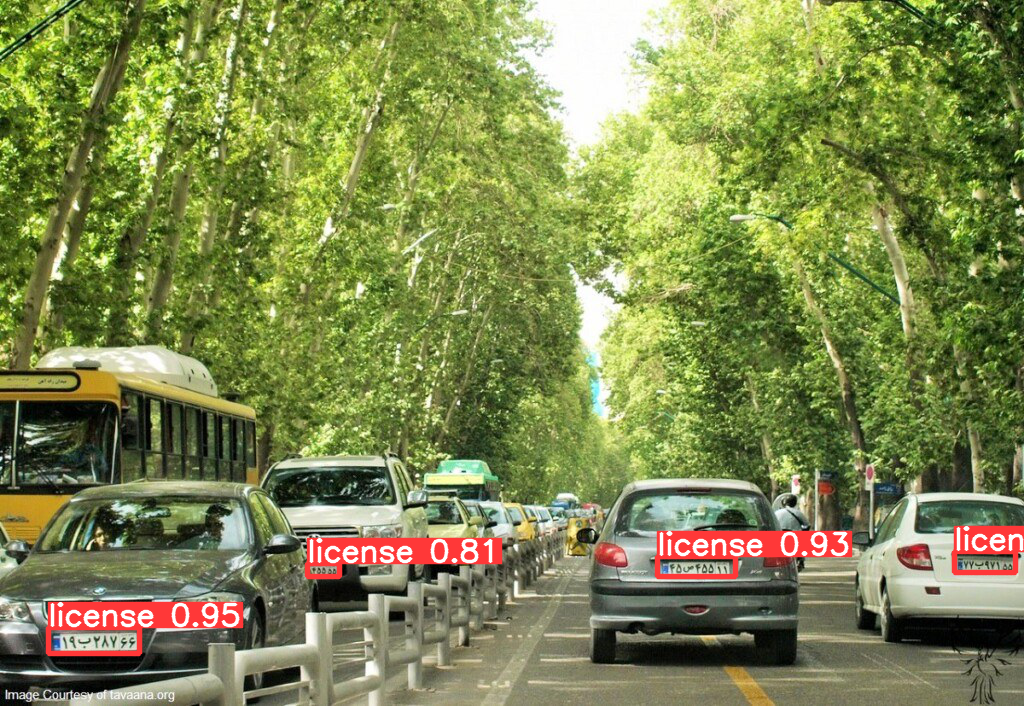

In [6]:
# Load model trained and Predict one image on that
import torch

# The address of the weights of the trained Yolo model in .pt format
CKPT_PATH = '/content/drive/MyDrive/resultYolo/ALPR/ALPR_best.pt'

# PyTorch Hub, a repository of pre-trained models such as yolo and can load locally
model_ALPR = torch.hub.load('yolov5',
                        'custom',
                        path=CKPT_PATH,
                        source='local',
                        force_reload=True)

# Image address for predict on model
img = '/content/khodro.jpeg'

# Predict and show image
results = model_ALPR(img)
results.show()

Predict Test data on model



In [7]:
# use yolo ALPR model to detect and recognize license plate characters from test images
import pandas as pd
import numpy as np
import os
import torch
from PIL import Image

# Load test images from the ALPR/images/test directory
imgs = os.listdir('ALPR/images/test')

pred_df = pd.DataFrame()
for pth in imgs:
    # Load image
    img = Image.open('ALPR/images/test/' + pth).convert('RGB')
    img = np.asarray(img)

    # Pass each test image through the model_ALPR model to get predictions
    pred = model_ALPR(img, augment=False)

    # Filter predictions with a confidence score above 0.45
    for i, row in pred.pandas().xyxy[0].iterrows():
        if row['confidence'] < 0.45: break
        row['path'] = pth
        # Append relevant information (prediction, confidence score, image path) to a DataFrame
        pred_df = pred_df.append(row)

# Reset the index of the DataFrame
pred_df = pred_df.reset_index()
# Print the final DataFrame containing the license plate predictions
pred_df

,index,xmin,ymin,xmax,ymax,confidence,class,name,path
0,0,268.351685,493.163696,461.396637,544.553528,0.956572,0,license,000152.jpg
1,0,240.920258,254.301605,381.342163,296.997284,0.961152,0,license,000019.jpg
2,1,42.400887,169.040680,62.831600,175.841537,0.589061,0,license,000019.jpg
3,0,254.910202,342.570526,457.967682,393.942444,0.961614,0,license,000163.jpg
4,0,196.612381,453.806274,413.409088,508.669373,0.945767,0,license,000269.jpg
...,...,...,...,...,...,...,...,...,...
299,0,225.275620,348.094849,422.411652,396.396637,0.953259,0,license,000393.jpg
300,0,205.344528,435.813080,404.910889,480.046082,0.950899,0,license,000275.jpg
301,0,200.539780,506.748688,398.947418,550.733948,0.945104,0,license,000478.jpg
302,1,539.486877,158.029938,570.802490,166.461594,0.774040,0,license,000478.jpg


In [8]:
#  crop the predicted license plate regions from the original test images
import os

# Check if cropped folder exists
if not os.path.exists('cropped'):
    # Create cropped folder
    os.makedirs('cropped')


for i, row in pred_df.iterrows():
    # Gets the image path from row['path']
    img = 'ALPR/images/test/' + row['path']

    # Opens the image using Pillow Library
    img = Image.open(img).convert('RGB')

    # Converts the image to a numpy array
    img = np.asarray(img)

    # Crops the image using the bounding box coordinates
    img_cropped = img[int(row['ymin']):int(row['ymax']), int(row['xmin']):int(row['xmax'])]

    # Converts the cropped image array back to a Pillow Image
    img_cropped = Image.fromarray(img_cropped)

    # Saves the cropped image to a 'cropped' directory
    cropped_img_path = 'cropped/' + row['path']
    img_cropped.save(cropped_img_path)

**2. train YOLO Models for CR Dataset**:

1. --data -> yaml file address
2. --epochs -> number of period of train
3. --weights -> The address of the pre-trained model weights file in .pt format if needed
4. --cfg -> model.yaml path for this example we use yolo v5 large
5. --batch-size -> total batch size
6. --device -> 0 for use GPU and 'CPU' for use CPU


In [9]:
!python yolov5/train.py \
        --data CR.yaml \
        --epochs 5 \
        --weights '/content/drive/MyDrive/resultYolo/CR/CR_best.pt' \
        --cfg yolov5l.yaml \
        --batch-size 16 \
        --device 0

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

train: weights=/content/drive/MyDrive/resultYolo/CR/CR_best.pt, cfg=yolov5l.yaml, data=CR.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, 

Load Model and Predict

YOLOv5 🚀 v7.0-196-gacdf73b Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5l summary: 267 layers, 46253673 parameters, 0 gradients, 108.1 GFLOPs
Adding AutoShape... 


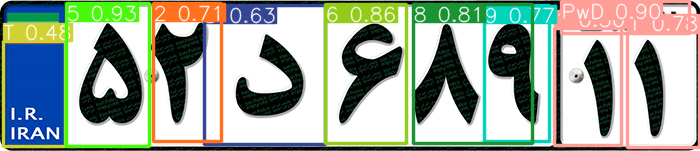

In [10]:
# Load model trained and Predict one image on that
import torch

# The address of the weights of the trained Yolo model in .pt format
CKPT_PATH = '/content/drive/MyDrive/resultYolo/CR/CR_best.pt'

# PyTorch Hub, a repository of pre-trained models such as yolo and can load locally
CR_model = torch.hub.load('yolov5',
                        'custom',
                        path=CKPT_PATH,
                        source='local',
                       force_reload=True)

# Image address for predict on model
image = '/content/pelak.jpeg'
# image_croped= '/content/cropped/000022.jpg'

# Predict and show image
results = CR_model(image)
results.show()

In [11]:
# read result as pandas dataframe
x = results.pandas().xyxy[0]

# sort according to confidence and extract top 8 according to x
text = x.sort_values('confidence',ascending=False)[:8].sort_values('xmin')
p = text['name'].values

# print licence plate number
print(r"{}{} {} {}{}{} | ایران:{}{}".format(p[0],p[1],p[2],p[3],p[4],p[5],p[6],p[7]))

52 D 689 | ایران:PwD1
